In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import pims

import dask
import dask.array as da
import tifffile as tf
from nd2reader import ND2Reader
# from pims import ND2_Reader as ND2Reader
# import aicsimageio.vendor.omexml as ome
import glob
import time, sys
sys.path.insert(0,'/home/jmamede/scripts/notebooks/libraries/')
from deco_libraries import Concat_OMEXML,update_progress, pimsmeta2OMEXML, Nd2meta2OMEXML, observer, init_RL_algo, deconv, depth_divide

In [39]:
filelist = glob.glob("/run/media/jmamede/Joao/CAruby/20200626/*trigger003_v*ome.tiff")
filelist.sort()

In [40]:
filelist


['/run/media/jmamede/Joao/CAruby/20200626/igfp1_caruby5_continue001trigger003_v01_PRJ.ome.tiff',
 '/run/media/jmamede/Joao/CAruby/20200626/igfp1_caruby5_continue001trigger003_v02_PRJ.ome.tiff',
 '/run/media/jmamede/Joao/CAruby/20200626/igfp1_caruby5_continue001trigger003_v03_PRJ.ome.tiff',
 '/run/media/jmamede/Joao/CAruby/20200626/igfp1_caruby5_continue001trigger003_v04_PRJ.ome.tiff',
 '/run/media/jmamede/Joao/CAruby/20200626/igfp1_caruby5_continue001trigger003_v05_PRJ.ome.tiff',
 '/run/media/jmamede/Joao/CAruby/20200626/igfp1_caruby5_continue001trigger003_v06_PRJ.ome.tiff',
 '/run/media/jmamede/Joao/CAruby/20200626/igfp1_caruby5_continue001trigger003_v07_PRJ.ome.tiff',
 '/run/media/jmamede/Joao/CAruby/20200626/igfp1_caruby5_continue001trigger003_v08_PRJ.ome.tiff',
 '/run/media/jmamede/Joao/CAruby/20200626/igfp1_caruby5_continue001trigger003_v09_PRJ.ome.tiff',
 '/run/media/jmamede/Joao/CAruby/20200626/igfp1_caruby5_continue001trigger003_v10_PRJ.ome.tiff',
 '/run/media/jmamede/Joao/CAru

In [72]:
xml = Concat_OMEXML(filelist, True)

Write PlaneTable:  0 0 0 0
Write PlaneTable:  0 0 1 1
Write PlaneTable:  0 0 2 2
Write PlaneTable:  1 0 0 3
Write PlaneTable:  1 0 1 4
Write PlaneTable:  1 0 2 5
Write PlaneTable:  2 0 0 6
Write PlaneTable:  2 0 1 7
Write PlaneTable:  2 0 2 8
Write PlaneTable:  3 0 0 9
Write PlaneTable:  3 0 1 10
Write PlaneTable:  3 0 2 11
Write PlaneTable:  4 0 0 12
Write PlaneTable:  4 0 1 13
Write PlaneTable:  4 0 2 14
Write PlaneTable:  5 0 0 15
Write PlaneTable:  5 0 1 16
Write PlaneTable:  5 0 2 17
Write PlaneTable:  6 0 0 18
Write PlaneTable:  6 0 1 19
Write PlaneTable:  6 0 2 20
Write PlaneTable:  7 0 0 21
Write PlaneTable:  7 0 1 22
Write PlaneTable:  7 0 2 23
Write PlaneTable:  8 0 0 24
Write PlaneTable:  8 0 1 25
Write PlaneTable:  8 0 2 26
Write PlaneTable:  9 0 0 27
Write PlaneTable:  9 0 1 28
Write PlaneTable:  9 0 2 29
Write PlaneTable:  10 0 0 30
Write PlaneTable:  10 0 1 31
Write PlaneTable:  10 0 2 32
Write PlaneTable:  11 0 0 33
Write PlaneTable:  11 0 1 34
Write PlaneTable:  11 0 2

java.lang.IndexOutOfBoundsException: java.lang.IndexOutOfBoundsException: Index: 75, Size: 75

In [78]:
filelist = glob.glob("/home/jmamede/Data/test/Concat/*_v01_*ome.tiff")
filelist

['/home/jmamede/Data/test/Concat/F2_igFP3Caruby3_Pbn_Rutin_VitC_NH4Cl_pump1stframe_v01_PRJ.ome.tiff',
 '/home/jmamede/Data/test/Concat/F2_igFP3Caruby3_Pbn_Rutin_VitC_NH4Cl_pump1stframe.001_v01_PRJ.ome.tiff',
 '/home/jmamede/Data/test/Concat/F2_igFP3Caruby3_Pbn_Rutin_VitC_NH4Cl_pump1stframe.005_v01_PRJ.ome.tiff',
 '/home/jmamede/Data/test/Concat/F2_igFP3Caruby3_Pbn_Rutin_VitC_NH4Cl_pump1stframe.004_v01_PRJ.ome.tiff']

In [41]:
for ficheiro in filelist:
    reader = pims.bioformats.BioformatsReader(filelist[1],java_memory='1024m')
    reader.bundle_axes = 'cyx'


/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


In [42]:
reader

<FramesSequenceND>
Axes: 4
Axis 'x' size: 2048
Axis 'y' size: 2044
Axis 'c' size: 3
Axis 't' size: 49
Pixel Datatype: <u2

In [44]:
reader.metadata.PlaneDeltaT(0,0)
prjxml = pimsmeta2OMEXML(reader, project=True,time_offset=69714,verbose=False)

49
69717.10796915
4122.04
No position X
No position Y
69717.10796915
4122.04
No position X
No position Y
69717.10796915
4122.04
No position X
No position Y
71515.36341214999
4122.16
No position X
No position Y
71515.36341214999
4122.16
No position X
No position Y
71515.36341214999
4122.16
No position X
No position Y
73315.37098615
4122.28
No position X
No position Y
73315.37098615
4122.28
No position X
No position Y
73315.37098615
4122.28
No position X
No position Y
75115.37025715
4122.12
No position X
No position Y
75115.37025715
4122.12
No position X
No position Y
75115.37025715
4122.12
No position X
No position Y
76915.39245215
4122.04
No position X
No position Y
76915.39245215
4122.04
No position X
No position Y
76915.39245215
4122.04
No position X
No position Y
78715.37390115
4121.9800000000005
No position X
No position Y
78715.37390115
4121.9800000000005
No position X
No position Y
78715.37390115
4121.9800000000005
No position X
No position Y
80515.37704315
4121.9800000000005
No 

In [48]:
prjxml.to_xml()

# pixel.Plane(counter).DeltaT = timesteps[t] + time_offset

'<?xml version=\'1.0\' encoding=\'utf-8\'?>\n<OME xmlns="http://www.openmicroscopy.org/Schemas/OME/2016-06" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" UUID="urn:uuid:cb8a3a5a-a539-4cfc-9a26-1d65d121a02d" xsi:schemaLocation="http://www.openmicroscopy.org/Schemas/OME/2016-06 http://www.openmicroscopy.org/Schemas/OME/2016-06/ome.xsd">\n  <Image ID="Image:0" Name="igfp1_caruby5_continue001trigger003_v02_PRJ.ome.tiff">\n    <AcquisitionDate>2021-05-23T19:55:34.630693</AcquisitionDate>\n    <Pixels BigEndian="true" DimensionOrder="XYCZT" ID="Pixels:0" PhysicalSizeX="0.108333333333333" PhysicalSizeY="0.108333333333333" SizeC="3" SizeT="49" SizeX="2048" SizeY="2044" SizeZ="1" Type="uint16">\n<Channel Color="16711935" ID="Channel:0:0" Name="FITC" SamplesPerPixel="1">\n        <LightPath />\n      </Channel>\n    <Channel Color="-16776961" ID="ae688931-c3a3-442f-b796-ef768110fb0a" Name="mRuby3" SamplesPerPixel="1" /><Channel Color="65535" ID="c867e394-e3ef-4682-8105-2527944e7821" Name

In [73]:
reader = pims.bioformats.BioformatsReader(filelist[0],java_memory='1024m')
reader.bundle_axes = 'cyx'
reader.iter_axes = 't'

In [74]:
reader[0].shape

(3, 1024, 1024)

In [73]:
np.dstack((reader[0][0],reader[0][1],reader[0][2]))

array([[[146, 135, 129],
        [146, 135, 129],
        [151, 129, 136],
        ...,
        [165, 148, 153],
        [151, 142, 149],
        [142, 144, 131]],

       [[146, 135, 129],
        [146, 135, 129],
        [151, 129, 136],
        ...,
        [165, 149, 153],
        [151, 143, 149],
        [142, 144, 131]],

       [[160, 135, 135],
        [160, 135, 135],
        [146, 130, 132],
        ...,
        [146, 129, 148],
        [140, 129, 144],
        [140, 132, 129]],

       ...,

       [[134, 141, 160],
        [134, 141, 160],
        [139, 145, 141],
        ...,
        [152, 142, 128],
        [150, 146, 123],
        [126, 161, 125]],

       [[148, 158, 155],
        [148, 158, 155],
        [138, 160, 145],
        ...,
        [142, 128, 132],
        [146, 144, 126],
        [134, 156, 127]],

       [[144, 172, 159],
        [144, 172, 159],
        [144, 168, 147],
        ...,
        [157, 131, 129],
        [153, 135, 129],
        [143, 148, 131]]

In [79]:
np.stack((reader[time][0],reader[time][1],reader[time][2]))
# array.shape


array([[[162, 162, 144, ..., 168, 161, 157],
        [162, 162, 144, ..., 168, 161, 157],
        [140, 140, 149, ..., 151, 145, 144],
        ...,
        [148, 148, 152, ..., 142, 130, 129],
        [155, 155, 154, ..., 135, 130, 121],
        [171, 171, 154, ..., 141, 133, 132]],

       [[141, 141, 133, ..., 145, 133, 127],
        [141, 141, 133, ..., 145, 133, 127],
        [136, 136, 129, ..., 138, 130, 123],
        ...,
        [143, 143, 148, ..., 143, 137, 141],
        [146, 146, 151, ..., 135, 133, 139],
        [161, 161, 150, ..., 139, 137, 136]],

       [[143, 143, 139, ..., 150, 144, 143],
        [143, 143, 139, ..., 150, 144, 143],
        [136, 137, 132, ..., 136, 131, 131],
        ...,
        [144, 144, 140, ..., 142, 137, 136],
        [150, 150, 142, ..., 135, 138, 142],
        [148, 148, 137, ..., 134, 135, 144]]], dtype=uint16)

In [87]:
for visit,ficheiro in enumerate(filelist):
    with tf.TiffWriter('/run/media/jmamede/Joao/CAruby/20200626/fix3/igfp1_caruby5_continue001trigger003_v'+str(visit+1).zfill(2)+'_PRJ.ome.tiff',
                       bigtiff=True,imagej=False) as tif:
        print("File:",ficheiro)
        first = True
        reader = pims.bioformats.BioformatsReader(ficheiro,java_memory='1024m')
        reader.bundle_axes = 'cyx'
        reader.iter_axes = 't'
        for time in range(reader.sizes['t']):
            print('Time:',time)
            if time <41:
                array = reader[time]
            elif time == 41:
                if visit<7:
                    array = reader[time]
                else:
                    array = np.stack((reader[time][2],reader[time][0],reader[time][1]))
            else:
                array = np.stack((reader[time][2],reader[time][0],reader[time][1]))
            if first:
                tif.save(array.astype(np.uint16)
                    , compress='ZLIB'
                    , description = prjxml.to_xml()
                    , photometric='minisblack'
                    #, datetime= True
                    , metadata= None
                    , contiguous=False
                    )
            else: 
                tif.save(array.astype(np.uint16)
                    , compress='ZLIB'
    #                 , description = xml.to_xml()
                    , photometric='minisblack'
                    #, datetime= True
                    , metadata= None
                    , contiguous=False
                    )

File: /run/media/jmamede/Joao/CAruby/20200626/igfp1_caruby5_continue001trigger003_v01_PRJ.ome.tiff
Time: 0
Time: 1
Time: 2
Time: 3
Time: 4
Time: 5
Time: 6
Time: 7
Time: 8
Time: 9
Time: 10
Time: 11
Time: 12
Time: 13
Time: 14
Time: 15
Time: 16
Time: 17
Time: 18
Time: 19
Time: 20
Time: 21
Time: 22
Time: 23
Time: 24
Time: 25
Time: 26
Time: 27
Time: 28
Time: 29
Time: 30
Time: 31
Time: 32
Time: 33
Time: 34
Time: 35
Time: 36
Time: 37
Time: 38
Time: 39
Time: 40
Time: 41
Time: 42
Time: 43
Time: 44
Time: 45
Time: 46
Time: 47
Time: 48
File: /run/media/jmamede/Joao/CAruby/20200626/igfp1_caruby5_continue001trigger003_v02_PRJ.ome.tiff
Time: 0
Time: 1
Time: 2
Time: 3
Time: 4
Time: 5
Time: 6
Time: 7
Time: 8
Time: 9
Time: 10
Time: 11
Time: 12
Time: 13
Time: 14
Time: 15
Time: 16
Time: 17
Time: 18
Time: 19
Time: 20
Time: 21
Time: 22
Time: 23
Time: 24
Time: 25
Time: 26
Time: 27
Time: 28
Time: 29
Time: 30
Time: 31
Time: 32
Time: 33
Time: 34
Time: 35
Time: 36
Time: 37
Time: 38
Time: 39
Time: 40
Time: 41
Tim

Time: 18
Time: 19
Time: 20
Time: 21
Time: 22
Time: 23
Time: 24
Time: 25
Time: 26
Time: 27
Time: 28
Time: 29
Time: 30
Time: 31
Time: 32
Time: 33
Time: 34
Time: 35
Time: 36
Time: 37
Time: 38
Time: 39
Time: 40
Time: 41
Time: 42
Time: 43
Time: 44
Time: 45
Time: 46
Time: 47
Time: 48
File: /run/media/jmamede/Joao/CAruby/20200626/igfp1_caruby5_continue001trigger003_v17_PRJ.ome.tiff
Time: 0
Time: 1
Time: 2
Time: 3
Time: 4
Time: 5
Time: 6
Time: 7
Time: 8
Time: 9
Time: 10
Time: 11
Time: 12
Time: 13
Time: 14
Time: 15
Time: 16
Time: 17
Time: 18
Time: 19
Time: 20
Time: 21
Time: 22
Time: 23
Time: 24
Time: 25
Time: 26
Time: 27
Time: 28
Time: 29
Time: 30
Time: 31
Time: 32
Time: 33
Time: 34
Time: 35
Time: 36
Time: 37
Time: 38
Time: 39
Time: 40
Time: 41
Time: 42
Time: 43
Time: 44
Time: 45
Time: 46
Time: 47
Time: 48
File: /run/media/jmamede/Joao/CAruby/20200626/igfp1_caruby5_continue001trigger003_v18_PRJ.ome.tiff
Time: 0
Time: 1
Time: 2
Time: 3
Time: 4
Time: 5
Time: 6
Time: 7
Time: 8
Time: 9
Time: 10
Tim

Time: 45
Time: 46
Time: 47
Time: 48


In [80]:
reader = pims.bioformats.BioformatsReader('/home/jmamede/Data/test/Concat/test.ome.tiff',java_memory='1024m')

OSError: The file "/home/jmamede/Data/test/Concat/test.ome.tiff" does not exist.

In [55]:
reader


<FramesSequenceND>
Axes: 4
Axis 'x' size: 1024
Axis 'y' size: 1024
Axis 'c' size: 3
Axis 't' size: 211
Pixel Datatype: <u2

Frame([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint16)
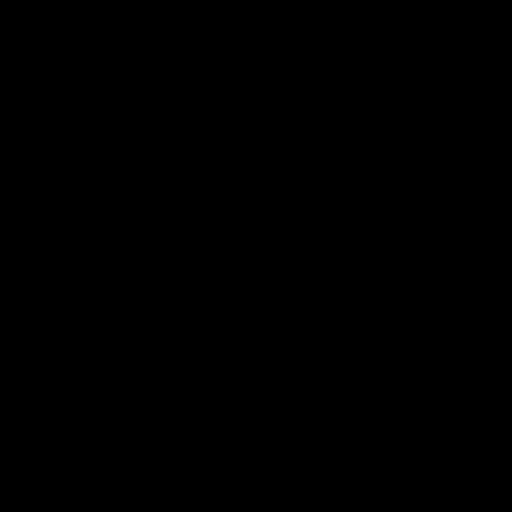

In [57]:
reader.bundle_axes = 'cyx'
reader[25]

In [58]:
import napari
%gui qt

# napari.view_image(all[:,0,:,:,:])
from naparimovie import Movie
v = napari.Viewer(show=True)
       # vmin=np.percentile(imgs[0],0.1),
       # vmax=np.percentile(imgs[0],99.9)
v.add_image(np.array(reader),
            # rgb=True,
            )


<Image layer 'Image' at 0x7ff9cf402b10>

In [85]:
reader = pims.bioformats.BioformatsReader(filelist[0],java_memory='1024m')
reader.bundle_axes = 'cyx'
filelist

['/home/jmamede/Data/test/Concat/F2_igFP3Caruby3_Pbn_Rutin_VitC_NH4Cl_pump1stframe_v01_PRJ.ome.tiff',
 '/home/jmamede/Data/test/Concat/F2_igFP3Caruby3_Pbn_Rutin_VitC_NH4Cl_pump1stframe.001_v01_PRJ.ome.tiff',
 '/home/jmamede/Data/test/Concat/F2_igFP3Caruby3_Pbn_Rutin_VitC_NH4Cl_pump1stframe.005_v01_PRJ.ome.tiff',
 '/home/jmamede/Data/test/Concat/F2_igFP3Caruby3_Pbn_Rutin_VitC_NH4Cl_pump1stframe.004_v01_PRJ.ome.tiff']

In [86]:
reader



<FramesSequenceND>
Axes: 3
Axis 'x' size: 1024
Axis 'y' size: 1024
Axis 'c' size: 3
Pixel Datatype: <u2